In [1]:
install.packages('cowplot')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Data Wrangling

In [2]:
#Read the data from the webpage into Jupyter
heart_disease <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
#Add column names based on the information given by the dataset webpage (to improve readability)
colnames(heart_disease) <- c("age", "sex", "chest_pain_type", "resting_blood_pressure", "chol", "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "ST_level", "slope", "number_of_major_vessels", "thal", "diagnosis_of_heart_disease")
#Select chosen predictor and class variables 
heart_data <- heart_disease |> mutate(diagnosis = as_factor(diagnosis_of_heart_disease)) |> select(age, resting_blood_pressure, chol, ST_level, diagnosis)
#Check to see if there are any NA values
which(is.na(heart_data))
    #There aren't any NA values (the function returned no positions with missing values)

head(heart_data, n =8)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


integer(0)

age,resting_blood_pressure,chol,ST_level,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,2.3,0
67,160,286,1.5,2
67,120,229,2.6,1
37,130,250,3.5,0
41,130,204,1.4,0
56,120,236,0.8,0
62,140,268,3.6,3
57,120,354,0.6,0


In [3]:
#Assign all values, 1-4, as "1" to indicate that there is a heart disease
heart_data["diagnosis"][heart_data["diagnosis"] == "2"] <- "1"
heart_data["diagnosis"][heart_data["diagnosis"] == "3"] <- "1"
heart_data["diagnosis"][heart_data["diagnosis"] == "4"] <- "1"
    #Source for code: https://www.statology.org/replace-values-in-data-frame-r/
#Split data into training and testing data; 75:25 split was chosen arbitrarily
heart_split <- initial_split(heart_data, prop = 0.75, strata = diagnosis)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

CODE NEEDED:
- Build KNN model + choose best K value 
- Evaluate accuracy
- Graph predictors + histograms (count)


## Model Building & Choosing Best K

In [16]:
knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> set_engine("kknn") |> set_mode("classification")
knn_recipe <- recipe(diagnosis~., data = heart_train) |> step_scale(all_predictors()) |> step_center(all_predictors())
data_fold <- vfold_cv(heart_train, v = 10, strata = diagnosis)
best_k <- workflow() |> add_model(knn_spec_tune) |> add_recipe(knn_recipe) |> tune_grid(data_fold, grid = 15) |> collect_metrics()

! Fold01: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold02: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold03: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold04: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold05: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold06: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring those levels.

! Fold07: internal:
  No observations were detected in `truth` for level(s): '2', '3', '4'
  Computation will proceed by ignoring 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6019598,10,0.03239192,Preprocessor1_Model01
1,roc_auc,hand_till,0.5995513,10,0.03238491,Preprocessor1_Model01
3,accuracy,multiclass,0.6292490,10,0.05601211,Preprocessor1_Model02
3,roc_auc,hand_till,0.6646853,10,0.05959367,Preprocessor1_Model02
4,accuracy,multiclass,0.6292490,10,0.05601211,Preprocessor1_Model03
4,roc_auc,hand_till,0.6646037,10,0.05546418,Preprocessor1_Model03
5,accuracy,multiclass,0.6479908,10,0.04355810,Preprocessor1_Model04
5,roc_auc,hand_till,0.6936480,10,0.05386570,Preprocessor1_Model04
6,accuracy,multiclass,0.6479908,10,0.04355810,Preprocessor1_Model05


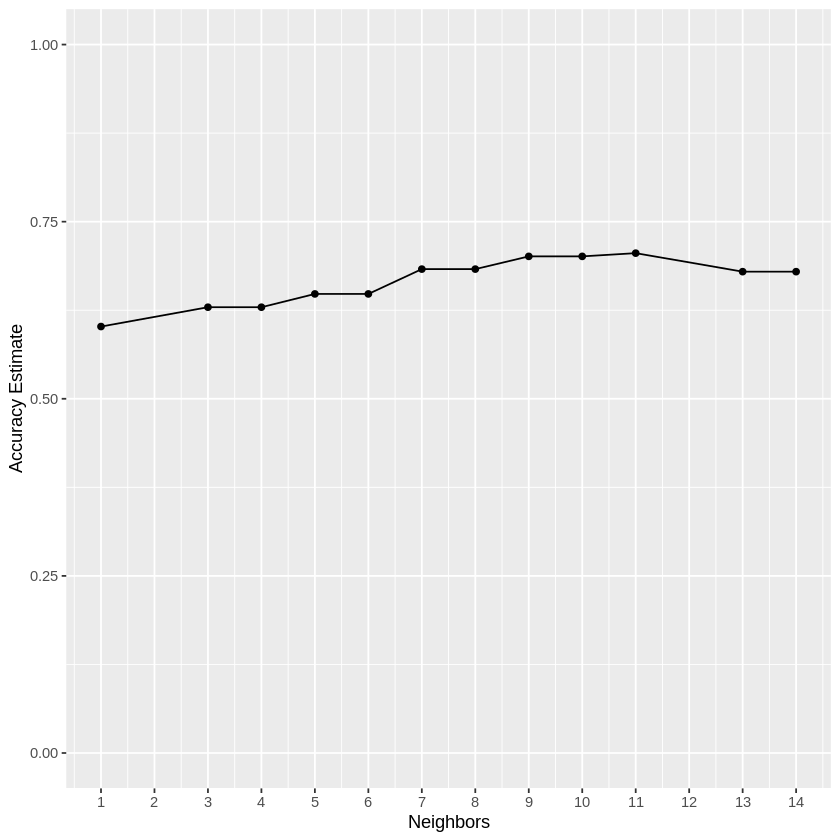

In [17]:
#we choose the best k parameter
accuracy_plot <- best_k |> filter(.metric == "accuracy") |> ggplot(aes(x = neighbors, y = mean)) + geom_point() + geom_line() + labs(x = "Neighbors", y = "Accuracy Estimate") +
     scale_x_continuous(breaks = seq(0, 14, by = 1)) + 
     scale_y_continuous(limits = c(0, 1.0))
accuracy_plot 
#it appears that the best value is k = 11

In [29]:
#Now we make the final model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |> set_engine("kknn") |> set_mode("classification")
knn_recipe <- recipe(diagnosis~., data = heart_train) |> step_scale(all_predictors()) |> step_center(all_predictors())
knn_fit <- workflow() |> add_model(knn_spec) |> add_recipe(knn_recipe) |> fit(heart_train)

## Model Evaluation

In [28]:
prediction <- predict(knn_fit, heart_test) |> bind_cols(heart_test)
accuracy <- metrics(prediction, truth = diagnosis, estimate = .pred_class)
accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6184211
kap,multiclass,0.2431319
